____Analysis of Insurance Information____

https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset/data

__Imports and Constants__

*Library Import*

In [1]:
#Import of Libraries

from sklearn.impute import SimpleImputer as Imputer
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns  # For statistical plots and better aesthetics (and also for the dataset)
import plotly.express as px
import plotly.graph_objects as go

*Constants*

In [2]:
PLOT_COLORS_STRONG = ['salmon','silver','paleturquoise','cornflowerblue','mediumorchid'] # [[89,24,37],[72,79,86],[37,94,116],[31,48,78],[109,28,74]] # ['skyblue','lightgreen','salmon','papayawhip','lightgray']
PLOT_COLORS_LIGHT = ['firebrick','dimgrey','teal','navy','darkmagenta'] #['darkblue','green','red','orange','dimgray']

__Functions__

*Plotting Functions*

In [3]:
def multiple_histplot(input_df,df_keys,x_plots,y_plots,plot_titles,x_labels,y_labels,x_size,y_size,colors,line_bool=False):
    # Set up the figure for subplots
    plt.figure(figsize=(x_size, y_size))

    plot_number = 0
    if x_plots > 1:
        plot_number += x_plots 
    if y_plots > 1:
        plot_number += y_plots

    for n in np.arange(0,plot_number,1):
        plt.subplot(y_plots, x_plots, int(n+1))
        
        sns.histplot(input_df[df_keys[n]], kde=line_bool, color=colors[n], bins=30)
        if line_bool:
            sns.kdeplot(input_df[df_keys[n]], linewidth=2)

        plt.title(plot_titles[n], fontsize=14)
        plt.xlabel(x_labels[n], fontsize=12)
        plt.ylabel(y_labels[n], fontsize=12)

    plt.tight_layout()
    plt.savefig(sum_string(plot_titles) +'.png')
    plt.show()


def multiple_boxplot(input_df,df_keys,x_plots,y_plots,plot_titles,x_labels,x_size,y_size,colors):
    # Set up the figure for subplots
    plt.figure(figsize=(x_size, y_size))

    plot_number = 0
    if x_plots > 1:
        plot_number += x_plots
    if y_plots > 1:
        plot_number += y_plots

    for n in np.arange(0,plot_number,1):
        plt.subplot(y_plots, x_plots, int(n+1))
        sns.boxplot(x=input_df[df_keys[n]], color=colors[n], width=0.5)
        plt.title(plot_titles[n], fontsize=16)
        plt.xlabel(x_labels[n], fontsize=12) 

    plt.tight_layout()
    plt.savefig(sum_string(plot_titles) +'.png')
    plt.show()


def multiple_pieplot(input_df,df_keys,x_plots,y_plots,plot_titles,x_size,y_size,colors,counted=False):
    # Set up the figure for subplots
    plt.figure(figsize=(x_size, y_size))

    plot_number = 0
    if x_plots > 1:
        plot_number += x_plots
    if y_plots > 1:
        plot_number += y_plots
    if y_plots == x_plots == 1:
        plot_number = 1

    for n in np.arange(0,plot_number,1):
        plt.subplot(y_plots, x_plots, int(n+1))
        if counted:
            explode = [0.05]*len(input_df[df_keys[n]].index)
            plt.pie(input_df[df_keys[n]], labels=input_df[df_keys[n]].index, autopct=lambda pct: '{:1.1f}%'.format(pct) if pct > 5 else '', startangle=90, colors=colors, explode=explode)
        else:
            counts = input_df[df_keys[n]].value_counts()
            explode = [0.05]*len(counts)
            print(counts,"\n")
            plt.pie(counts, labels=counts.index, autopct=lambda pct: '{:1.1f}%'.format(pct) if pct > 5 else '', startangle=90, colors=colors, explode=explode)
        plt.title(plot_titles[n], fontsize=12)

    plt.tight_layout()
    plt.savefig(sum_string(plot_titles) +'.png')
    plt.show()


def barplot_count(input_df,plot_titles,x_key,hue_key,colors,x_size,y_size):
    plt.figure(figsize=(x_size, y_size))
    sns.countplot(x=x_key, data = input_df,palette=colors,hue=hue_key, stat="percent")

    for container in plt.gca().containers:
        plt.gca().bar_label(container, fmt='%.1f%%')
    plt.title(plot_titles)
    plt.tight_layout()
    plt.savefig(plot_titles +'.png')
    plt.show()


def barplot(input_df, x_key, y_key, hue_key, colors, plot_titles, x_label, y_label):
    
    sns.barplot(x=input_df[x_key], y=input_df[y_key],palette=colors,hue=input_df[hue_key])
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_titles)
    
    plt.savefig(plot_titles +'.png')
    plt.show()

def scatterplot(input_df, x_key, y_key, hue_key, colors, plot_titles):
    sns.scatterplot(x=input_df[x_key], y=input_df[y_key],hue=input_df[hue_key],palette= colors ,alpha=0.6)
    plt.title(plot_titles)
    plt.savefig(plot_titles +'.png')
    plt.show()


def heatmap(input_df,plot_titles,cmap_colors,x_size,y_size):
    plt.figure(figsize=(x_size, y_size))
    sns.heatmap(input_df.corr(), annot=True, cmap=cmap_colors, fmt=".2f")
    plt.title(plot_titles)
    plt.savefig(plot_titles +'.png')
    plt.show()

*Other Functions*

In [4]:
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obesity'


def classify_age_bmi_smoking(row):
    if row['smoker'] == 'yes' and (row['bmi'] >= 30 or row['bmi'] <= 18.5):
        return 'High Risk'
    elif row['smoker'] == 'yes' or (row['bmi'] >= 30 or row['bmi'] <= 18.5):
        return 'Moderate Risk'
    else:
        return 'Low Risk'


def classify_age_group(age):
    if age < 30:
        return 'Young Adult'
    elif 30 <= age <= 50:
        return 'Middle Aged'
    else:
        return 'Senior'


def upper_string_lists(str_list):
    output_list = []
    for s in str_list:
        output_list.append(s.upper())
        print(s)
    return output_list


def sum_string(string_list):
    return_string = ""
    for s in string_list:
        return_string += "_"+s

    return return_string

__Check and Preperation of Data__

In [5]:
# Read in data
insurance_df = pd.read_csv("insurance.csv", sep =",")
# Check the first few rows of the dataset
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Check dataset info
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Check for missing values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# Get a statistical summary of numerical columns
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [9]:
# Check for duplicate rows
duplication_check = insurance_df.duplicated()
print("Number of Duplicates:",duplication_check.sum())

print("\nDuplicates:")
insurance_df.iloc[np.where(duplication_check==True)[0]]

Number of Duplicates: 1

Duplicates:


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
# Removal of duplicates
insurance_df = insurance_df.drop_duplicates()
print("\nNumber of Duplicates:")
duplication_check.sum()


Number of Duplicates:


np.int64(1)

__Provide an Overview of the Data__


Age Distribution
BMI Distribution
Charges Distribution


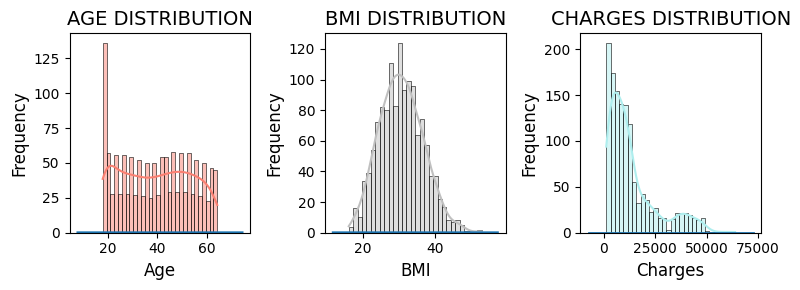

In [11]:
multiple_histplot(insurance_df,
                  ['age','bmi','charges'],
                  3,1,
                 upper_string_lists(['Age Distribution','BMI Distribution','Charges Distribution']),
                 ['Age','BMI','Charges'],
                 ['Frequency','Frequency','Frequency'],
                 8,3,
                 PLOT_COLORS_STRONG,
                 True)

Age Boxplot
BMI Boxplot
Charges Boxplot


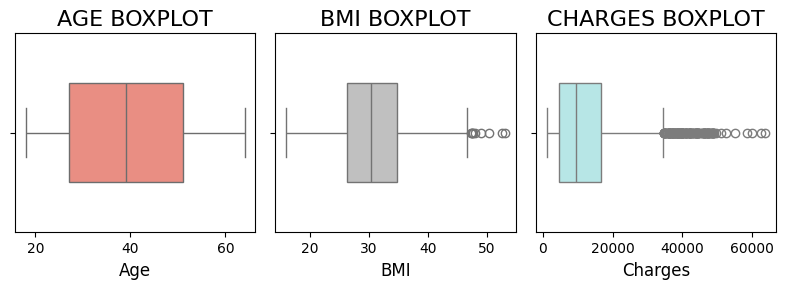

In [12]:
multiple_boxplot(insurance_df,
                 ['age','bmi','charges'],
                 3,1,
                 upper_string_lists(['Age Boxplot','BMI Boxplot','Charges Boxplot']),
                 ['Age','BMI','Charges'],
                 8,3,
                 PLOT_COLORS_STRONG)

Sex Distribution
Region Distribution
Smoker Distribution
Children Distribution


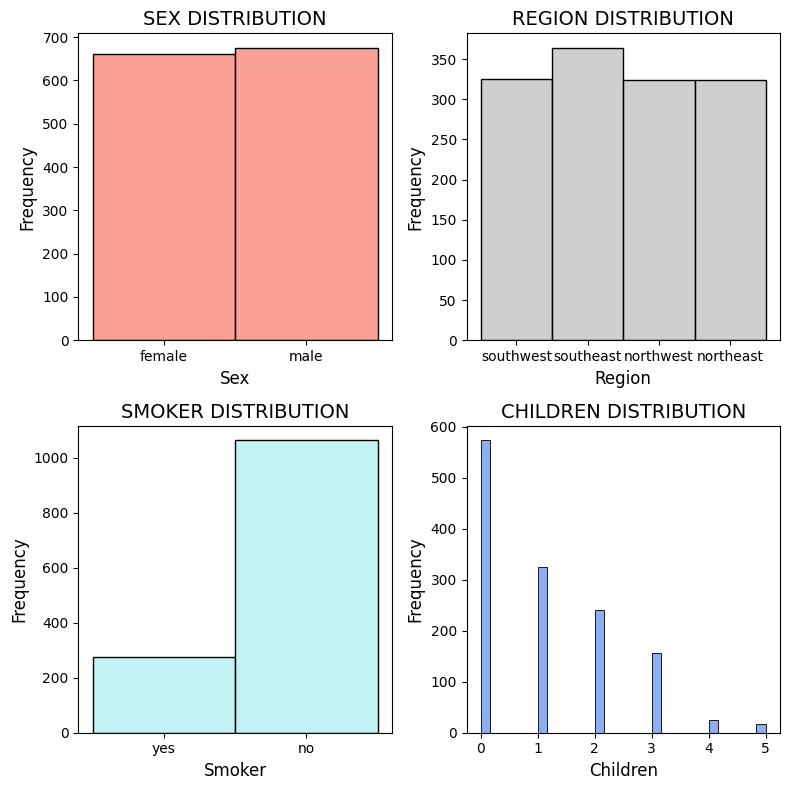

In [13]:
multiple_histplot(insurance_df,
                  ['sex','region','smoker','children'],
                  2,2,
                 upper_string_lists(['Sex Distribution','Region Distribution','Smoker Distribution','Children Distribution']),
                 ['Sex','Region','Smoker','Children'],
                 ['Frequency','Frequency','Frequency','Frequency'],
                 8,8,
                 PLOT_COLORS_STRONG)

Distribution of Sex
Distribution of Regions
Distribution of Smokers
Distribution of Children
sex
male      675
female    662
Name: count, dtype: int64 

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64 

smoker
no     1063
yes     274
Name: count, dtype: int64 

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64 



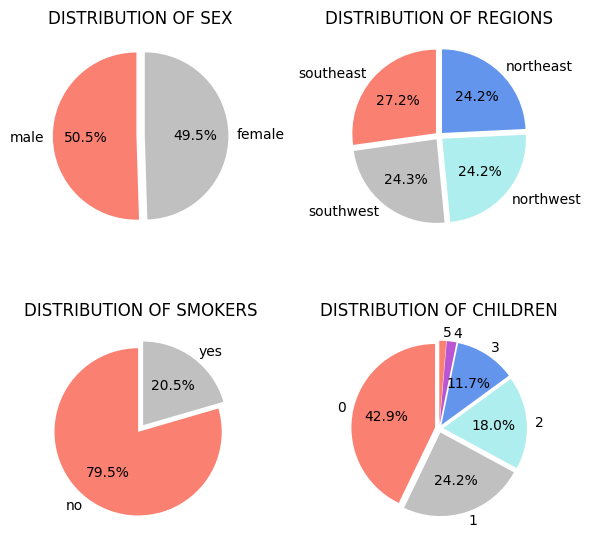

In [14]:
multiple_pieplot(insurance_df,
                 ['sex','region','smoker','children'],
                 2,2,
                upper_string_lists(['Distribution of Sex','Distribution of Regions','Distribution of Smokers','Distribution of Children']),
                6,6,
                PLOT_COLORS_STRONG)


Smokers at Northeast
Smokers at Northwest
Smokers at Southeast
Smokers at Southwest


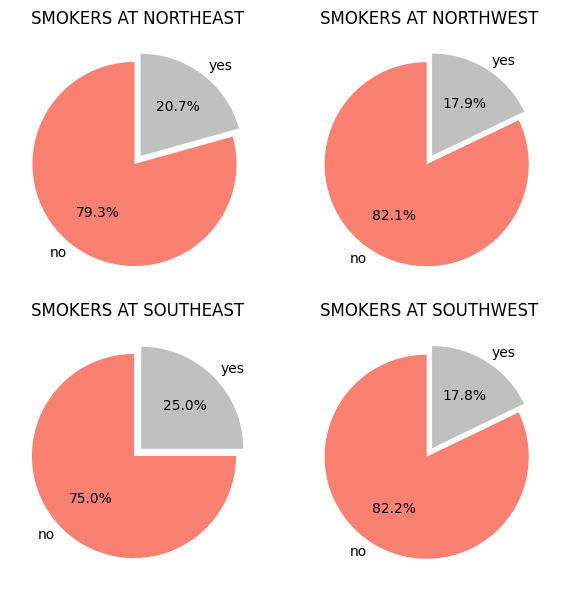

In [15]:
smoke_region_df = insurance_df.groupby('region')['smoker'].value_counts()

multiple_pieplot(smoke_region_df,
                 ['northeast','northwest','southeast','southwest'],
                 2,2,
                 upper_string_lists(['Smokers at Northeast','Smokers at Northwest','Smokers at Southeast','Smokers at Southwest']),
                6,6,
                PLOT_COLORS_STRONG,
                True)

C:\Users\bjoer\AppData\Local\Temp\ipykernel_26724\551462034.py:79: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(x=x_key, data = input_df,palette=colors,hue=hue_key, stat="percent")


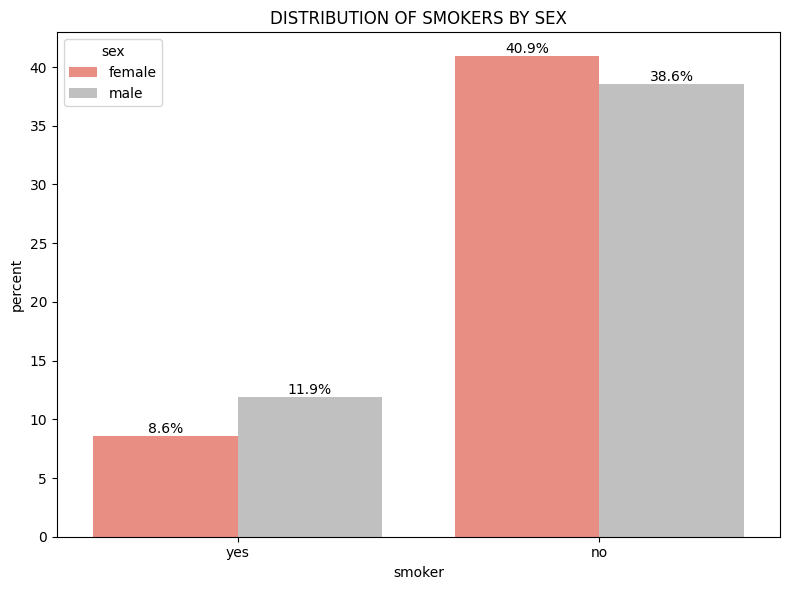

In [16]:
barplot_count(insurance_df,
              'Distribution of smokers by sex'.upper(),
              'smoker',
              'sex',
              PLOT_COLORS_STRONG,
              8,6)

In [17]:
insurance_df.groupby('region')['smoker'].value_counts().unstack()

smoker,no,yes
region,,
northeast,257,67
northwest,266,58
southeast,273,91
southwest,267,58


Smokers at Males
Smokers at Females


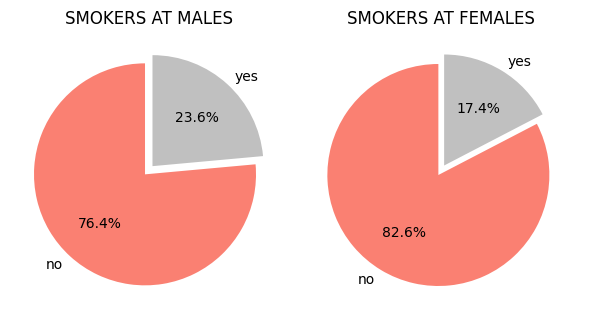

In [18]:
smoke_region_df = insurance_df.groupby('sex')['smoker'].value_counts()

multiple_pieplot(smoke_region_df,
                 ['male','female'],
                 2,1,
                 upper_string_lists(['Smokers at Males','Smokers at Females']),
                6,6,
                PLOT_COLORS_STRONG,
                True)

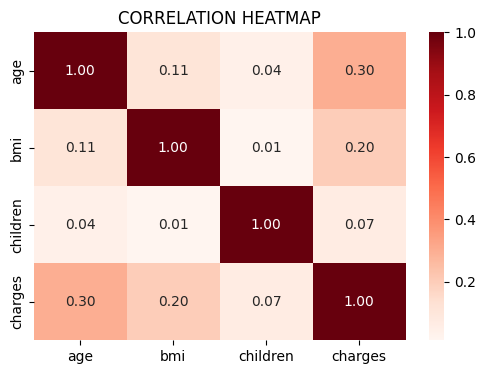

In [19]:
# Heatmap: age, BMI, children, charges (only numeric values)
heatmap(insurance_df[['age', 'bmi', 'children', 'charges']],
        "Correlation Heatmap".upper(),
        'Reds',
        6,4)


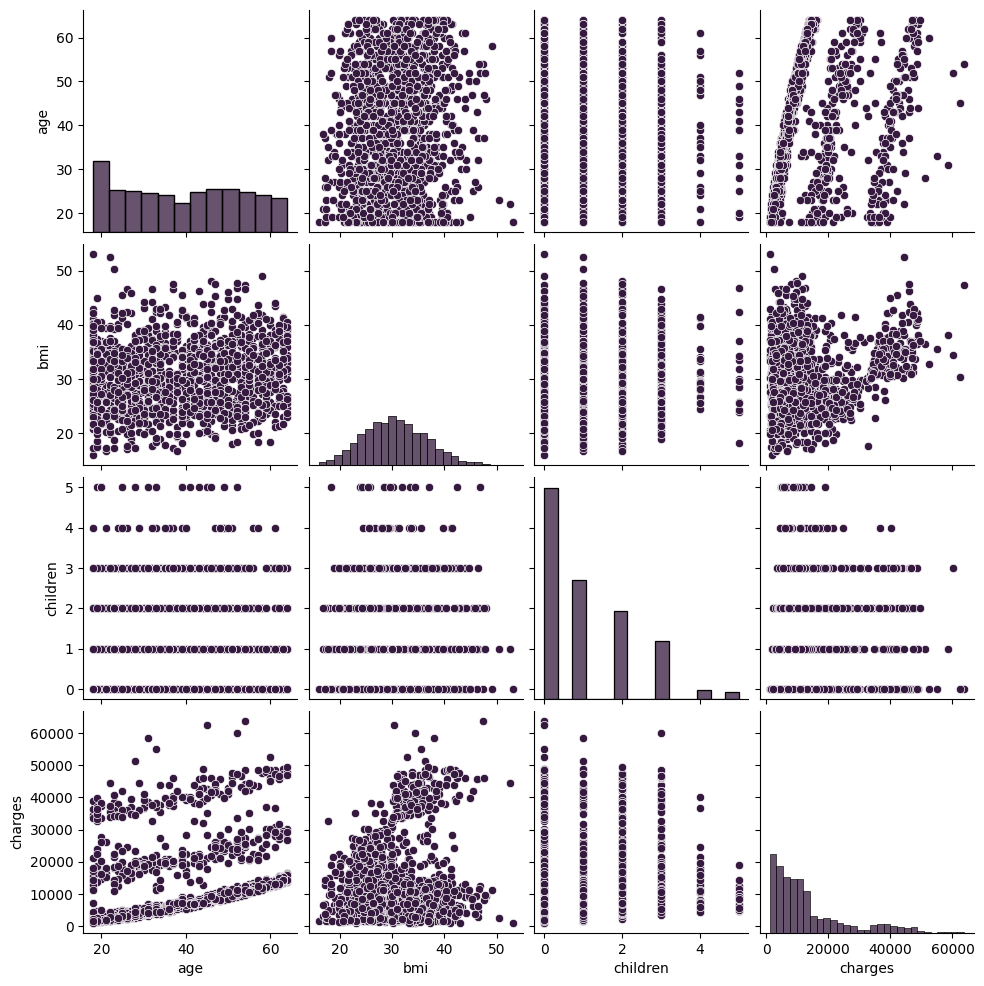

In [20]:
#  Complete overview of relations --> "enhanced Heatmap"
sns.set_palette("rocket")
sns.pairplot(insurance_df)
plt.show()

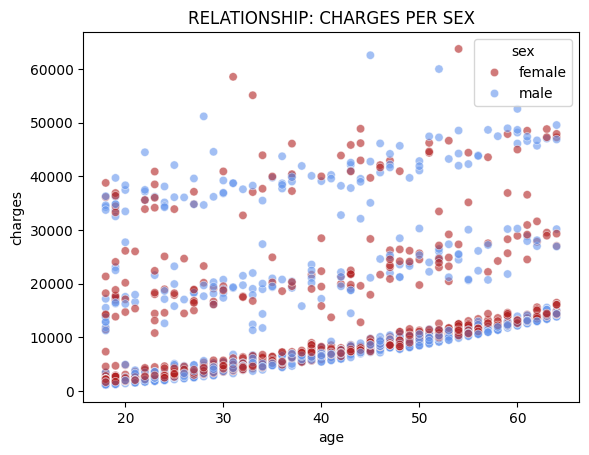

In [21]:
scatterplot(insurance_df,
            'age', 'charges', 'sex', 
            ['firebrick','cornflowerblue'],
            "Relationship: charges per sex".upper())

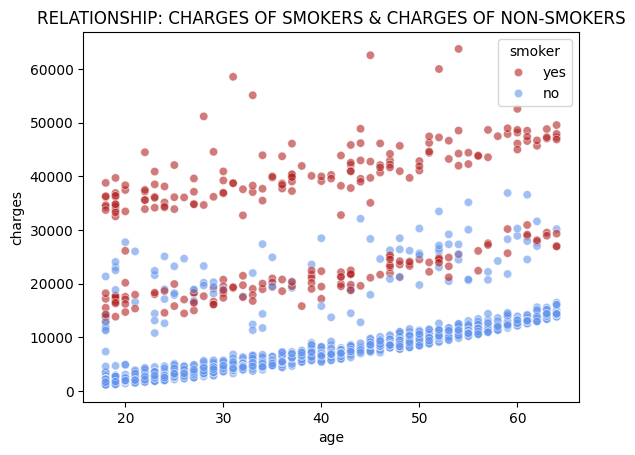

In [22]:
scatterplot(insurance_df,
            'age', 'charges', 'smoker', 
            ['firebrick','cornflowerblue'], 
            "Relationship: charges of smokers & charges of non-smokers".upper())

C:\Users\bjoer\AppData\Local\Temp\ipykernel_26724\551462034.py:91: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x=input_df[x_key], y=input_df[y_key],palette=colors,hue=input_df[hue_key])


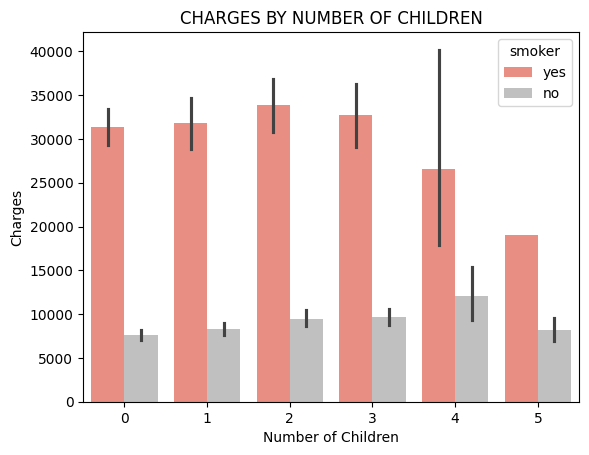

In [23]:
barplot(insurance_df, 
        'children', 'charges', 'smoker', 
        PLOT_COLORS_STRONG, 
        'Charges by Number of Children'.upper(), 
        'Number of Children', 'Charges')

   age     sex     bmi  children smoker     region      charges       bmi_type
0   19  female  27.900         0    yes  southwest  16884.92400     Overweight
1   18    male  33.770         1     no  southeast   1725.55230        Obesity
2   28    male  33.000         3     no  southeast   4449.46200        Obesity
3   33    male  22.705         0     no  northwest  21984.47061  Normal weight
4   32    male  28.880         0     no  northwest   3866.85520     Overweight
bmi_type
Obesity          706
Overweight       386
Normal weight    225
Underweight       20
Name: count, dtype: int64 



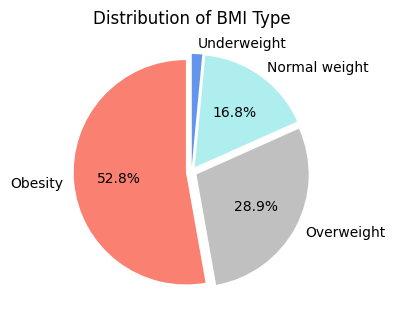

In [24]:
insurance_df['bmi_type'] = insurance_df['bmi'].apply(classify_bmi)
print(insurance_df.head())

multiple_pieplot(insurance_df,
                 ['bmi_type'],
                 1,1,
                 ['Distribution of BMI Type'],
                4,4,
                PLOT_COLORS_STRONG)


C:\Users\bjoer\AppData\Local\Temp\ipykernel_26724\551462034.py:91: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=input_df[x_key], y=input_df[y_key],palette=colors,hue=input_df[hue_key])


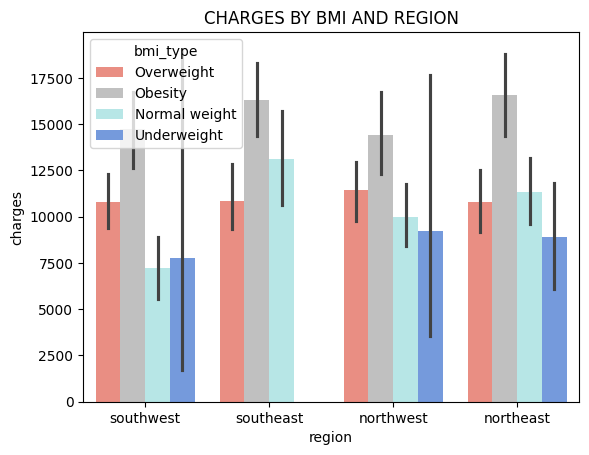

In [25]:
barplot(insurance_df,
        'region','charges','bmi_type',
        PLOT_COLORS_STRONG,
        'Charges by bmi and region'.upper(),
        'region',
        'charges')

Distribution of Risk Type
risk
Moderate Risk    701
Low Risk         486
High Risk        150
Name: count, dtype: int64 



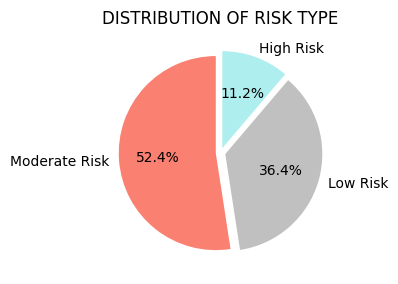

In [26]:
insurance_df['risk'] = insurance_df.apply(classify_age_bmi_smoking, axis=1)
insurance_df.head()

multiple_pieplot(insurance_df,
                 ['risk'],
                 1,1,
                 upper_string_lists(['Distribution of Risk Type']),
                4,4,
                PLOT_COLORS_STRONG)


In [27]:
insurance_df['age_type'] = insurance_df['age'].apply(classify_age_group)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_type,risk,age_type
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Moderate Risk,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Obesity,Moderate Risk,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Obesity,Moderate Risk,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Normal weight,Low Risk,Middle Aged
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Low Risk,Middle Aged


C:\Users\bjoer\AppData\Local\Temp\ipykernel_26724\551462034.py:91: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x=input_df[x_key], y=input_df[y_key],palette=colors,hue=input_df[hue_key])


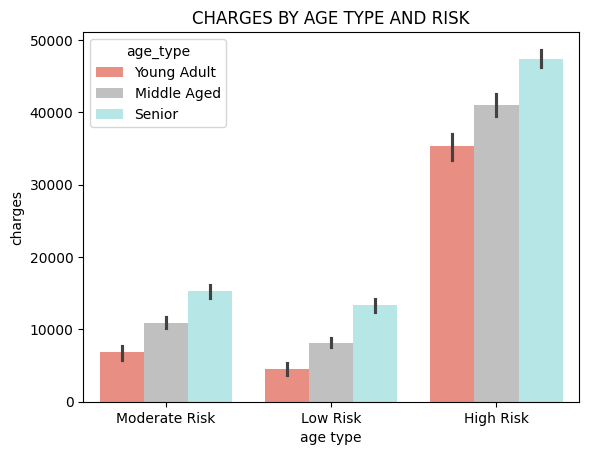

In [28]:
barplot(insurance_df,
        'risk','charges','age_type',
        PLOT_COLORS_STRONG,
        'Charges by age type and risk'.upper(),
        'age type',
        'charges')

__Linear Regression__

*Functions*

In [29]:
def detect_outliers_iqr(column, threshold=1):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

*Remove Outliers*

Number of outliers:
age          0
bmi         47
charges    169
dtype: int64
Original DataFrame shape: (1337, 10)
Cleaned DataFrame shape: (1129, 10)
Age Boxplot
BMI Boxplot
Charges Boxplot


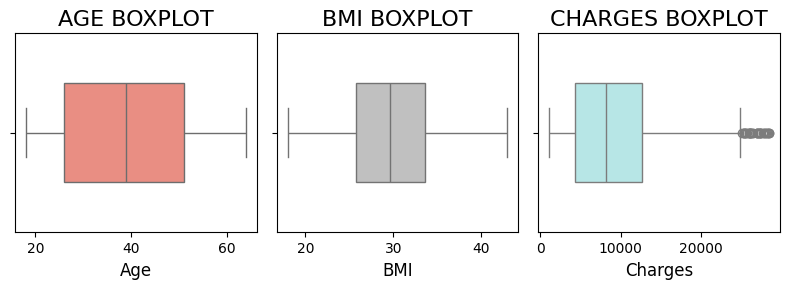

In [30]:
columns = ['age', 'bmi', 'charges']
outliers = insurance_df[columns].apply(detect_outliers_iqr)

print("Number of outliers:")
print(outliers.sum())

cleaned_df = insurance_df[~outliers.any(axis=1)]

print("Original DataFrame shape:", insurance_df.shape)
print("Cleaned DataFrame shape:", cleaned_df.shape)

multiple_boxplot(cleaned_df,
                 ['age','bmi','charges'],
                 3,1,
                 upper_string_lists(['Age Boxplot','BMI Boxplot','Charges Boxplot']),
                 ['Age','BMI','Charges'],
                 8,3,
                 PLOT_COLORS_STRONG)

*Adapt Distribution of Charges*

C:\Users\bjoer\AppData\Local\Temp\ipykernel_26724\1005685100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['charges'] = np.log1p(cleaned_df['charges'])  # np.log1p is log(1 + x)


   age     sex     bmi  children smoker     region   charges
0   19  female  27.900         0    yes  southwest  9.734236
1   18    male  33.770         1     no  southeast  7.453882
2   28    male  33.000         3     no  southeast  8.400763
3   33    male  22.705         0     no  northwest  9.998137
4   32    male  28.880         0     no  northwest  8.260455
Age Distribution
BMI Distribution
Charges Distribution


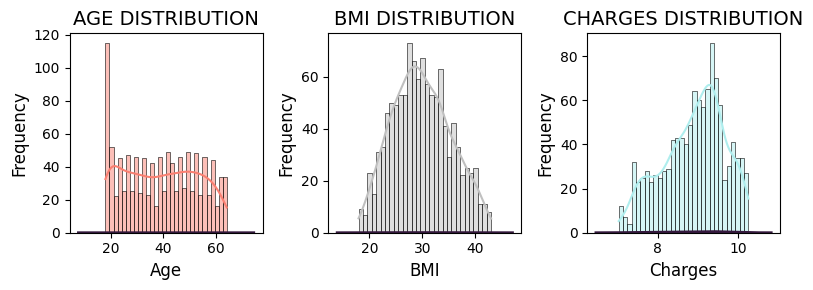

In [31]:
# Apply log transformation to 'charges' column
cleaned_df['charges'] = np.log1p(cleaned_df['charges'])  # np.log1p is log(1 + x)

cleaned_df = cleaned_df.drop(['bmi_type','risk','age_type'], axis=1)
print(cleaned_df.head())
multiple_histplot(cleaned_df,
                  ['age','bmi','charges'],
                  3,1,
                 upper_string_lists(['Age Distribution','BMI Distribution','Charges Distribution']),
                 ['Age','BMI','Charges'],
                 ['Frequency','Frequency','Frequency'],
                 8,3,
                 PLOT_COLORS_STRONG,
                 True)

*Adapt Data for Linear Regression*

Transformation of Sex, Smoker and Region

In [1]:
# 1. Encoding binary categorical variables (sex and smoker)
cleaned_df['sex'] = cleaned_df['sex'].map({'male': 0, 'female': 1})
cleaned_df['smoker'] = cleaned_df['smoker'].map({'no': 0, 'yes': 1})

# 2. One-Hot Encoding for region
# Create a new column for each unique region and assign 0 or 1 based on the value
regions = cleaned_df['region'].unique()  # Get unique regions
for region in regions:
    cleaned_df[region] = cleaned_df['region'].apply(lambda x: 1 if x == region else 0)

# Drop the original 'region' column as it is now encoded
cleaned_df.drop('region', axis=1, inplace=True)

# Display the transformed dataframe to ensure encoding was done correctly
cleaned_df.head()

NameError: name 'cleaned_df' is not defined

*Standardization*

In [33]:
# Function to standardize a column
def standardize_column(col):
    mean = col.mean()
    std = col.std()
    return (col - mean) / std

# Apply standardization to all numeric columns
columns_to_standardize = ['age', 'bmi', 'children', 'charges']  # We standardize numeric columns only

for col in columns_to_standardize:
    cleaned_df[col] = standardize_column(cleaned_df[col])

# Display the dataframe to verify the scaling
cleaned_df.head()

,age,sex,bmi,children,smoker,charges,southwest,southeast,northwest,northeast
0,-1.436011,1,-0.361123,-0.888643,1,1.089896,1,0,0,0
1,-1.507805,0,0.709290,-0.068301,0,-1.863695,0,1,0,0
2,-0.789863,0,0.568878,1.572383,0,-0.637262,0,1,0,0
3,-0.430892,0,-1.308447,-0.888643,0,1.431710,0,0,1,0
4,-0.502686,0,-0.182417,-0.888643,0,-0.818993,0,0,1,0


In [34]:
# Verify the scaling
cleaned_df[columns_to_standardize].mean(), cleaned_df[columns_to_standardize].std()

# Desired output: mean close to 0, std close to 1

(age         2.485956e-16
 bmi        -4.279620e-16
 children    3.618796e-17
 charges     9.991024e-16
 dtype: float64,
 age         1.0
 bmi         1.0
 children    1.0
 charges     1.0
 dtype: float64)

*Linear Regression (Numpy)*

In [35]:
# Independend variables
X = cleaned_df[['age', 'sex', 'bmi', 'children', 'smoker', 'southwest', 'southeast', 'northwest', 'northeast']].values
y = cleaned_df['charges'].values

# add a column of ones for the Bias (axis part)
X = np.column_stack((np.ones(X.shape[0]), X))

# Execution of Linear Regression
coeffs, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)

# Show results
print(f"Koeffizienten: \n{coeffs}")
print(f"\nResiduals: \n{residuals}")
print(f"\nRank: \n{rank}")
print(f"\nS: \n{s}")


Koeffizienten: 
[-0.18030031  0.6848456   0.12165434  0.03022904  0.17806089  1.60251768
 -0.12431461 -0.12461777 -0.00569467  0.07432673]

Residuals: 
[]

Rank: 
9

S: 
[4.21652131e+01 3.54561092e+01 3.38030657e+01 3.17939535e+01
 1.68318643e+01 1.67229947e+01 1.63322980e+01 1.50507287e+01
 9.60300979e+00 1.49288234e-14]


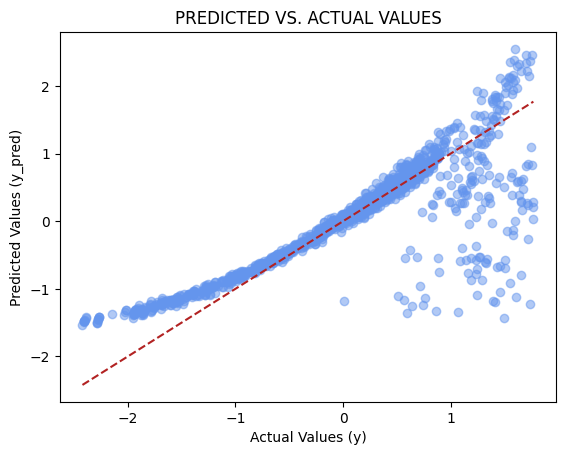

In [36]:
# Predictions for all Features
X_all = cleaned_df[['age', 'sex', 'bmi', 'children', 'smoker', 'southwest', 'southeast', 'northwest', 'northeast']].values
X_all = np.column_stack((np.ones(X_all.shape[0]), X_all))
y_pred = X_all @ coeffs

# Scatter-Plot: Predicted vs. Actual Values
plt.scatter(y, y_pred, color='cornflowerblue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='firebrick', linestyle='--')  # Diagonal Line

plt.xlabel('Actual Values (y)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Predicted vs. Actual Values'.upper())

plt.show()